In [1]:
import pandas as pd
import numpy as np
import pickle
import scikitplot as skplt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder

# Section 1) Summary of your project (10%)

1. Due to the raging Covid-19 epidemic, the number of daily screenings around the world is increasing. How to use machine learning to make preliminary judgments to reduce personnel consumption and avoid the risk of inflection while waiting ate the testing station when the pandimic continues to rise. Our goal is to use the model to predict whether this person is diagnosed.

2. The data is collected through questionnaire that distributed through social media, and each question will be served as an input feature in the machine learning model. The questionnaire receives 67 responses. Before data analysis, we have to clean and preprocess the data as the response is raw data and some answers have a different format or missing values. After data cleaning, we can choose different machine learning models and apply the selected model to predict whether a person is diagnosed with Covid-19. Our model's input is the respondents' features like fever, sore throat, running nose, headache, etc.

3. For the questionnaire stage, our success criterion is the number of questionnaires finally available is more than 50. we believe that if the data set is too small, it will still be unconvincing. For the stage of building and testing the model, given that the size of our data set is small, then the test set that is divided out will be even smaller, so every correct or wrong prediction will have a notable impact on the accuracy rate. Therefore, based on the size of the test set, we hope that the prediction accuracy rate can be higher than 60%. For our purpose that verifying our conjecture, the 60% accuracy rate is sufficient to show that our direction is correct. If we have the opportunity to obtain a larger dataset, we are confident that we can obtain a much higher accuracy rate.

# Section 2) Show the code and architecutre of your ML (20%)

### In our project, we used three models to predict output such as Logistic Regression, KNN, and Gradient Boosting Classifier. After we compared three of algorithms, we realized logistic regression has the best performance of accuracy.  

In [3]:
data = pd.read_csv('Yuan_and_Wu_Week10_data.csv')
data.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Covid-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,Yes,Yes
1,Yes,Yes,Yes,No,No,No,No,Yes,No,No
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
3,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes


In [4]:
e=LabelEncoder()

In [5]:
data['Breathing Problem']=e.fit_transform(data['Breathing Problem'])
data['Fever']=e.fit_transform(data['Fever'])
data['Dry Cough']=e.fit_transform(data['Dry Cough'])
data['Sore throat']=e.fit_transform(data['Sore throat'])
data['Running Nose']=e.fit_transform(data['Running Nose'])
data['Chronic Lung Disease']=e.fit_transform(data['Chronic Lung Disease'])
data['Headache']=e.fit_transform(data['Headache'])
data['Heart Disease']=e.fit_transform(data['Heart Disease'])
data['Diabetes']=e.fit_transform(data['Diabetes'])
data['Covid-19']=e.fit_transform(data['Covid-19'])

In [6]:
data.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Covid-19
0,1,1,1,1,1,0,0,0,1,1
1,1,1,1,0,0,0,0,1,0,0
2,1,1,1,1,1,1,1,1,1,1
3,1,1,0,1,1,1,0,0,0,1
4,1,1,1,0,1,0,1,0,1,1


# Section 3) Show the output of your model training with your harvested data set (30%)

In [7]:
x=data.drop('Covid-19',axis=1)
y=data['Covid-19']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [9]:
import matplotlib.pyplot as plt
# Make confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = np.around((cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]),decimals=2)
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Logistic Regression

In [10]:
model = LogisticRegression()
#Fit the model
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
#Score/Accuracy
acc_logreg=model.score(x_test, y_test)*100
acc_logreg

85.71428571428571

In [11]:
predl_test = model.predict(x_test)
predl_train = model.predict(x_train)

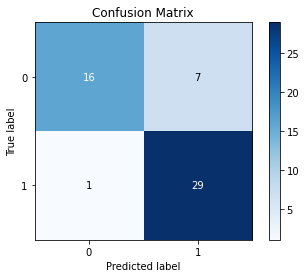

In [12]:
# display confusion matrix for training dataset
skplt.metrics.plot_confusion_matrix(y_train,predl_train, normalize= False)
plt.show()

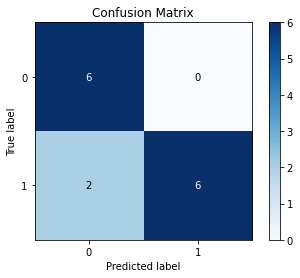

In [13]:
# display confusion matrix for testing dataset
skplt.metrics.plot_confusion_matrix(y_test,predl_test, normalize= False)
plt.show()

## KNeighborsClassifier

In [14]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
#Score/Accuracy
acc_knn=knn.score(x_test, y_test)*100
acc_knn

85.71428571428571

In [15]:
pred2_test = knn.predict(x_test)
pred2_train = knn.predict(x_train)

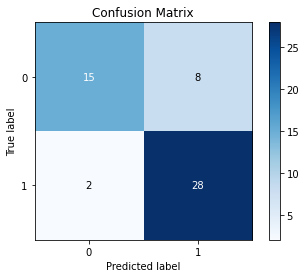

In [16]:
# display confusion matrix for training dataset
skplt.metrics.plot_confusion_matrix(y_train,pred2_train, normalize= False)
plt.show()

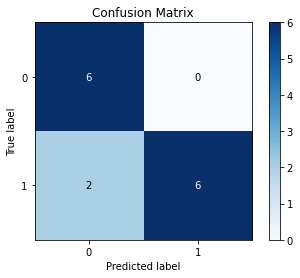

In [17]:
# display confusion matrix for testing dataset
skplt.metrics.plot_confusion_matrix(y_test,pred2_test, normalize= False)
plt.show()

## GradientBoostingClassifier

In [18]:
#Train the model
GBR = GradientBoostingRegressor(n_estimators=100, max_depth=4)
#Fit
GBR.fit(x_train, y_train)
acc_gbk=GBR.score(x_test, y_test)*100
acc_gbk

49.13645641755524

In [19]:
models = pd.DataFrame({
    'Model': ['Logistic Regression',    
              'KNN', 'Gradient Boosting Classifier'],
    'Score': [ acc_logreg, 
              acc_knn, 
              acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Logistic Regression,85.714286
1,KNN,85.714286
2,Gradient Boosting Classifier,49.136456


### Both of confusion matrixes for testing and traning dataset have the best performance in Logistic Regression.

# Section 4) Save your ML model for distribution (10%)

In [20]:
# save model
RF_Filename = "Yuan_Wu_week13_model.pkl"  

with open(RF_Filename, 'wb') as file:  
    pickle.dump(model, file)

In [21]:
# Load the Model back from file
with open(RF_Filename, 'rb') as file:  
    Yuan_Wu_week11_Model = pickle.load(file)

Yuan_Wu_week11_Model

LogisticRegression()

# Section 5) Inference test of your model (20%)

### We collected our friends' information to test the model and we created a dataset that contains our friends' information. All three of them have not been diagnosed Covid-19. However, we put their symptoms in our trained model, we discover one of them actually been infect. Therefore, our prediction achieves 67.6% acurracy in this case. 

In [22]:
# create dataset
df_feature = pd.DataFrame(np.array([[0,1,1,1,0,0,1,0,0], [0,0,1,1,1,0,0,0,0], [0,0,1,1,1,0,0,1,1]]),
                   columns=['Breathing Problem','Fever','Dry Cough','Sore throat','Running Nose','Chronic Lung Disease','Headache','Heart Disease','Diabetes'])

In [23]:
result = Yuan_Wu_week11_Model.predict(df_feature).tolist()

In [24]:
# print output
for a in result:
    if a == 1:
        print('Person diagnosed with Covid-19')
    else:
        print('Person does not diagnose with Covid-19')

Person does not diagnose with Covid-19
Person does not diagnose with Covid-19
Person does not diagnose with Covid-19


# Section 6) Summary (10%)

Based on the result, we think the accuracy meets our expectations and it seems to succeed for us. However, we noticed that the hardest part is the process of training the model because the accuracy rate of the prediction is not always the same each time. And we think the reason that causes this situation is because we do not have enough datasets to train the model, if we want to acquire more stable predictions in the future, we might collect more data and put more features in our dataset.